In [17]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [18]:
vid_path = Path("H:\\Documents\\Cars")

#check if the path exists
if not vid_path.exists():
    print(f"Path {vid_path} does not exist")
else:
    print(f"Path {vid_path} exists")
    for file in vid_path.iterdir():
        print(file)

Path H:\Documents\Cars exists
H:\Documents\Cars\VIDEO_20240512_135237029.mp4


In [19]:
vids = vid_path.iterdir()
print(vids)

#grab the first video
vid = next(vids)
print(vid)

#load the video
cap = cv2.VideoCapture(str(vid))

#check the video properties

#frame width
frame_width = int(cap.get(3))
#frame height
frame_height = int(cap.get(4))
#frame rate
frame_rate = int(cap.get(5))
#number of frames
num_frames = int(cap.get(7))
#duration
duration = num_frames/frame_rate

print(f"Frame width: {frame_width}")
print(f"Frame height: {frame_height}")
print(f"Frame rate: {frame_rate}")
print(f"Number of frames: {num_frames}")
print(f"Duration: {duration}")


<generator object Path.iterdir at 0x0000022EC8ECD560>
H:\Documents\Cars\VIDEO_20240512_135237029.mp4
Frame width: 2304
Frame height: 1296
Frame rate: 19
Number of frames: 1200
Duration: 63.1578947368421


In [20]:
def vid_to_frames(vid, stride=200, save_dir=None, img_ext="jpg", verbose=False):
    """
    Function to extract frames from a video.
    Args:
        vid: Path to the video file.
        stride: Number of frames to skip each time.
        save_dir: Directory to save the frames.
        img_ext: Image extension to save the frames.
        verbose: Whether to print the video properties.
    Returns:
        frames: List of frames.
    Save the frames as images in the save_dir in the format <date>_<time>_<frame_number>.<img_ext>
    """
    
    
    #load the video
    cap = cv2.VideoCapture(str(vid))
    vid_name = vid.stem
    # VIDEO_20240512_135237029
    date = vid_name.split("_")[1]
    time = vid_name.split("_")[2][:4]
    print(date, time)

    
    #check if the video is loaded
    if not cap.isOpened():
        print(f"Error loading video {vid}")
        return None
    
    #get the video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_rate = int(cap.get(5))
    num_frames = int(cap.get(7))
    duration = num_frames/frame_rate

    if verbose:  
        print(f"Frame width: {frame_width}")
        print(f"Frame height: {frame_height}")
        print(f"Frame rate: {frame_rate}")
        print(f"Number of frames: {num_frames}")
        print(f"Duration: {duration}")
    
    #create a directory to save the frames
    if save_dir is not None:
        save_dir = Path(save_dir)
        save_dir.mkdir(parents=True, exist_ok=True)
    
    #read the frames
    frames = []
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % stride == 0:
            frames.append(frame)
            if save_dir is not None:
                img_name = save_dir / f"{date}_{time}_{int(count/stride)}.{img_ext}"
                cv2.imwrite(str(img_name), frame)
        count += 1

    cap.release()
    cv2.destroyAllWindows()

    return frames


In [21]:
frames = vid_to_frames(vid, stride=200, save_dir="frames")

#check the number of frames
print(f"Number of frames: {len(frames)}")

20240512 1352
Number of frames: 6


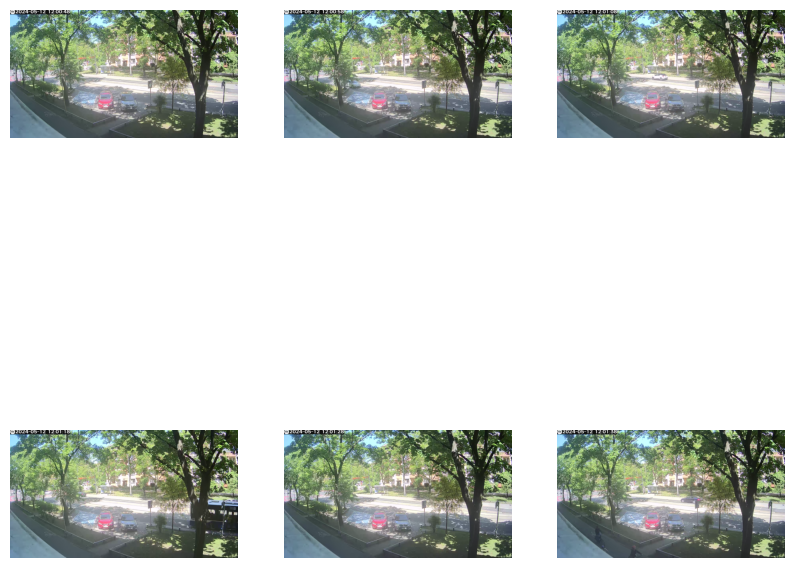

In [22]:
#plot the frames

fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    ax.axis("off")

plt.show()


## Saving into a working directory



In [24]:
frames = vid_to_frames(vid, stride=200, verbose=True)

20240512 1352
Frame width: 2304
Frame height: 1296
Frame rate: 19
Number of frames: 1200
Duration: 63.1578947368421
